In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

places_df = {}
train_data_df = pd.read_csv('./Dataset/train.csv')
test_data_df = pd.read_csv('./Dataset/test.csv')
# train_data_df = pd.read_csv('./Dataset/test.csv')

In [69]:
train_data_df.reset_index(inplace=True)
test_data_df.reset_index(inplace=True)

In [70]:
all = len(train_data_df)
attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date','monthly_rent']
# attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(train_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

flat_model: 19/ 60000
floor_area_sqm: 146/ 60000
furnished: 1/ 60000
lease_commence_date: 54/ 60000
monthly_rent: 113/ 60000


In [71]:
all = len(test_data_df)
attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(test_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

flat_model: 18/ 30000
floor_area_sqm: 145/ 30000
furnished: 1/ 30000
lease_commence_date: 54/ 30000


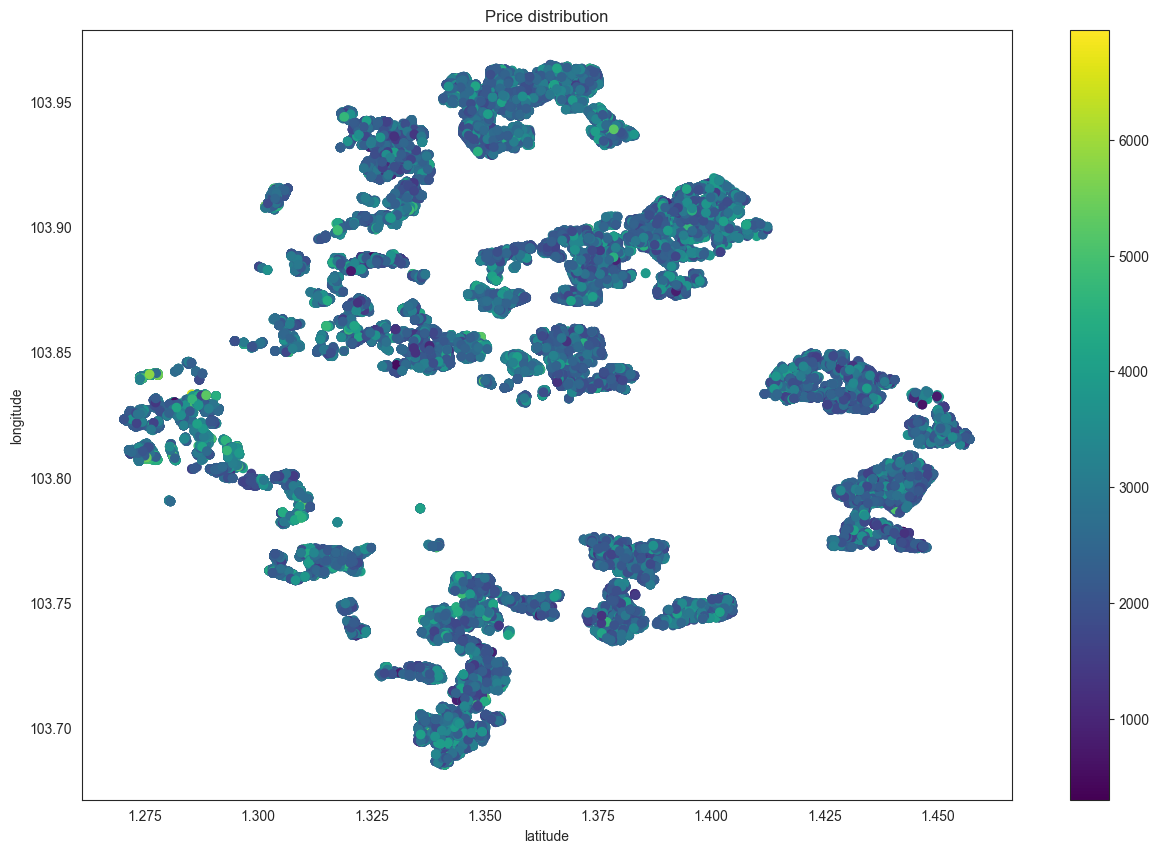

In [72]:
def visual_train_data():
    plt.figure(figsize=(15, 10))
    plt.scatter(train_data_df['latitude'], train_data_df['longitude'], c=train_data_df['monthly_rent'], cmap='viridis')
    plt.colorbar()
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    plt.title('Price distribution')
    plt.savefig('visual_train_data_latlng.png')
    plt.show()

visual_train_data()

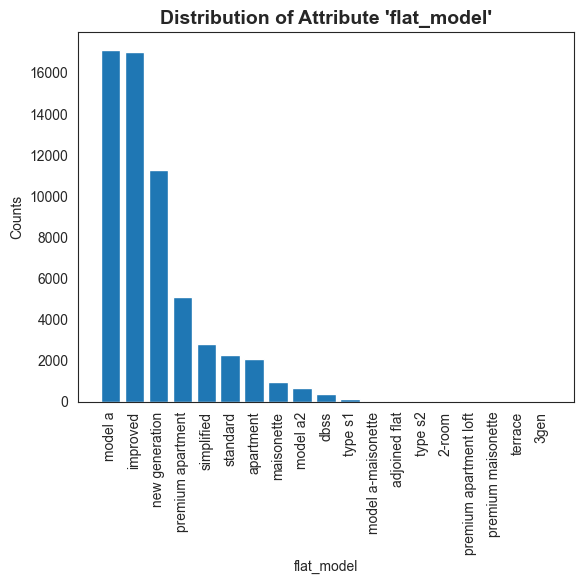

<Figure size 640x480 with 0 Axes>

In [73]:
train_data_df['flat_model'] = train_data_df['flat_model'].str.lower()
counts = train_data_df['flat_model'].value_counts()
counts = counts.reset_index()
counts.columns = ['flat_model', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.flat_model, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('flat_model') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'flat_model\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_flat_model.png')

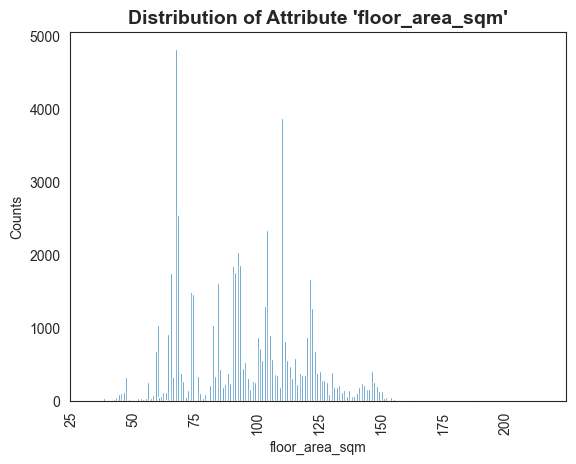

<Figure size 640x480 with 0 Axes>

In [74]:
counts = train_data_df['floor_area_sqm'].value_counts()
counts = counts.reset_index()
counts.columns = ['floor_area_sqm', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.floor_area_sqm, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('floor_area_sqm') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'floor_area_sqm\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_floor_area_sqm.png')

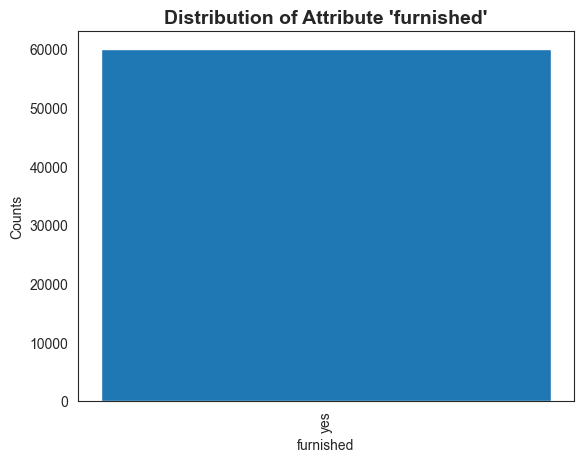

<Figure size 640x480 with 0 Axes>

In [75]:
train_data_df['furnished'] = train_data_df['furnished'].str.lower()
counts = train_data_df['furnished'].value_counts()
counts = counts.reset_index()
counts.columns = ['furnished', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.furnished, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('furnished') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'furnished\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_furnished.png')

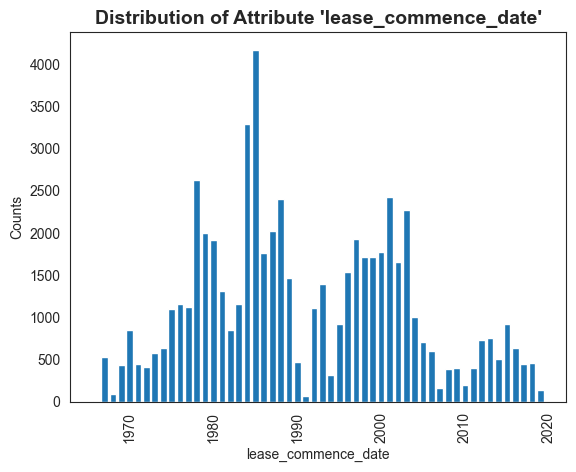

<Figure size 640x480 with 0 Axes>

In [76]:
counts = train_data_df['lease_commence_date'].value_counts()
counts = counts.reset_index()
counts.columns = ['lease_commence_date', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.lease_commence_date, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('lease_commence_date') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'lease_commence_date\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_lease_commence_date.png')

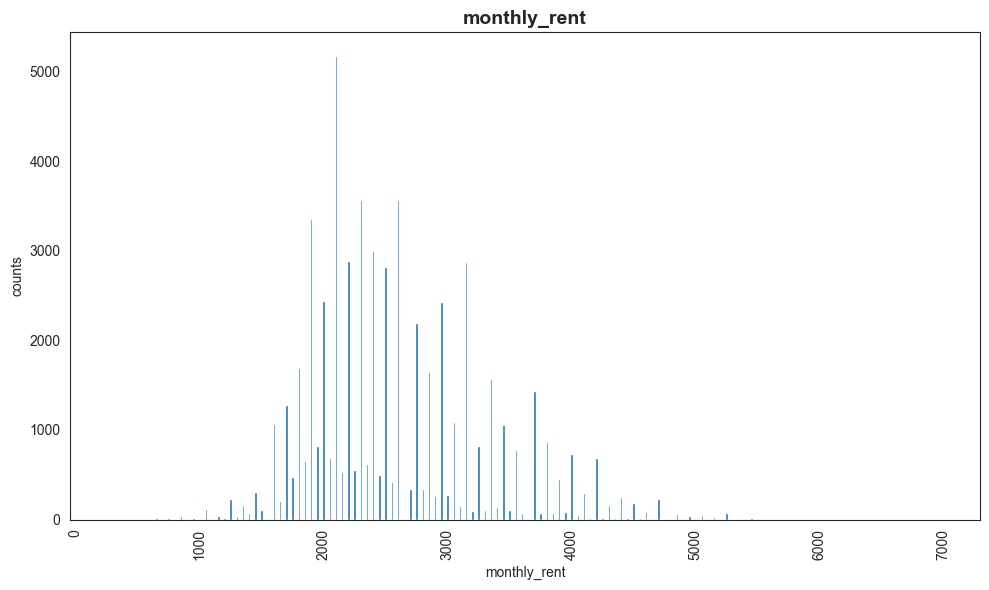

<Figure size 640x480 with 0 Axes>

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

unique_values = train_data_df['monthly_rent'].value_counts().reset_index()
unique_values.columns = ['monthly_rent', 'counts']
fig, ax = plt.subplots(figsize=(10, 6))  # 调整图形大小
plt.bar(unique_values.monthly_rent, unique_values.counts, width=20)  # 调整宽度
ax.set_xlabel('monthly_rent')
ax.set_ylabel('counts')
ax.set_title('monthly_rent', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()
plt.savefig('visual_train_monthly_rent.png')


In [78]:
import pandas as pd
missing_values = train_data_df.isnull().sum()
print(missing_values)


index                  0
rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64


There are 0 numerical features with skewness > 0.5 :



Series([], dtype: float64)

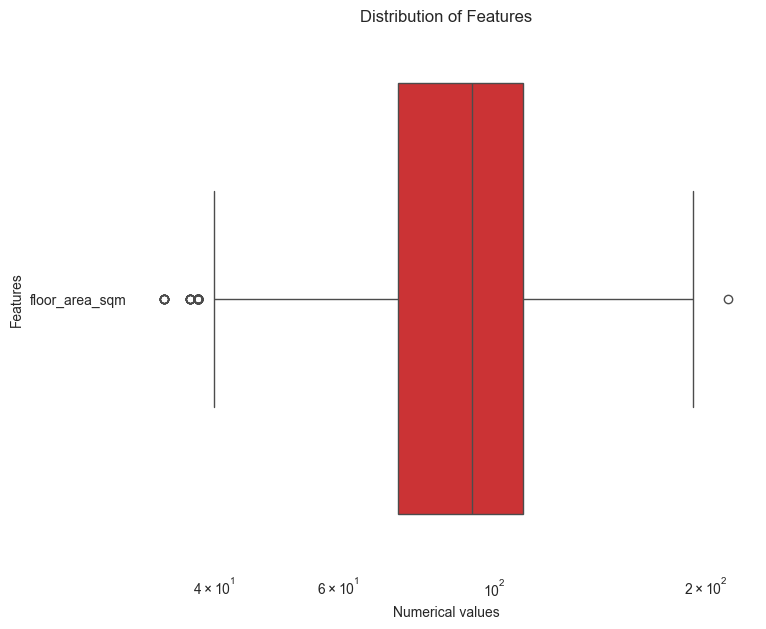

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats

# List all numerical features
numerical_features = ['floor_area_sqm']
# Boxplot to visualize the skewness of the numerical features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=train_data_df[numerical_features] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Features")
ax.set(xlabel="Numerical values")
ax.set(title="Distribution of Features")
sns.despine(trim=True, left=True)
# Check skewness of all features
skewness = train_data_df[numerical_features].apply(lambda x: skew(x))

high_skewed = skewness[abs(skewness) > 0.5]

print("There are {} numerical features with skewness > 0.5 :\n".format(high_skewed.shape[0]))
high_skewed

In [80]:
duplicates = train_data_df[train_data_df.duplicated()]
print('There are {} duplicate records in the dataset'.format(duplicates.shape[0]))

There are 0 duplicate records in the dataset


In [81]:
train_data_df = train_data_df.drop_duplicates(ignore_index=True)
print('After dropping duplicate data, the training dataset now has {} rows'.format(train_data_df.shape[0]))
train_data_df.head()

After dropping duplicate data, the training dataset now has 60000 rows


,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [82]:
train_data_df = pd.get_dummies(train_data_df, columns=['furnished'])
train_data_df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,furnished_yes
0,0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,True
1,1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,True
2,2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,True
3,3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,True
4,4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,True


In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data_df['flat_model'] = label_encoder.fit_transform(train_data_df['flat_model'])
train_data_df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,furnished_yes
0,0,2021-09,jurong east,257,Jurong East Street 24,3 room,10,67.0,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,True
1,1,2022-05,bedok,119,bedok north road,4-room,10,92.0,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,True
2,2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,5,67.0,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,True
3,3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,3,149.0,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,True
4,4,2022-11,kallang/whampoa,34,Whampoa West,3-room,5,68.0,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,True


In [84]:
test_data_df["flat_model"] = label_encoder.transform(test_data_df['flat_model'])

In [87]:
train_data_df['lease_commence_date'].value_counts()

lease_commence_date
1985    4171
1984    3295
1978    2626
2001    2422
1988    2400
2003    2266
1987    2016
1979    2000
1997    1923
1980    1912
2000    1773
1986    1763
1998    1712
1999    1709
2002    1651
1996    1540
1989    1464
1993    1399
1981    1314
1983    1160
1976    1151
1977    1119
1992    1114
1975    1096
2004    1007
2015     923
1995     922
1970     853
1982     848
2013     748
2012     724
2005     709
2016     630
1974     630
2006     600
1973     578
1967     523
2014     499
1990     470
2018     453
1971     450
2017     443
1969     430
1972     409
2011     401
2009     396
2008     383
1994     317
2010     202
2007     163
2019     137
1968      89
1991      66
1966       1
Name: count, dtype: int64

In [66]:
train_data_df['lease_commence_date'] = train_data_df['lease_commence_date'].apply(str)
label_encoder = LabelEncoder()
train_data_df['lease_commence_date'] = label_encoder.fit_transform(train_data_df['lease_commence_date'])
train_data_df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,furnished_yes
0,0,2021-09,jurong east,257,Jurong East Street 24,3 room,10,67.0,17,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,True
1,1,2022-05,bedok,119,bedok north road,4-room,10,92.0,12,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,True
2,2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,5,67.0,5,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,True
3,3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,3,149.0,27,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,True
4,4,2022-11,kallang/whampoa,34,Whampoa West,3-room,5,68.0,6,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,True


In [67]:
## !!!!!!! NOTE: 这里出现未知年份，这列暂时不encode了！！！！！
test_data_df['lease_commence_date'] = label_encoder.transform(test_data_df['lease_commence_date'])

ValueError: y contains previously unseen labels: 1984

In [88]:
train_data_df.dtypes
train_data_df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,furnished_yes
0,0,2021-09,jurong east,257,Jurong East Street 24,3 room,10,67.0,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,True
1,1,2022-05,bedok,119,bedok north road,4-room,10,92.0,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,True
2,2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,5,67.0,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,True
3,3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,3,149.0,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,True
4,4,2022-11,kallang/whampoa,34,Whampoa West,3-room,5,68.0,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,True


In [90]:
test_data_df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,0,2023-01,hougang,245,hougang street 22,5-room,5,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region
1,1,2022-09,sembawang,316,sembawang vista,4-room,7,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region
2,2,2023-07,clementi,708,Clementi West Street 2,4-room,10,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region
3,3,2021-08,jurong east,351,Jurong East Street 31,3 room,7,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region
4,4,2022-03,jurong east,305,jurong east street 32,5-room,5,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region


In [43]:
train_data_df.to_csv('processed_data.csv', index=False)

In [89]:
train_data_df[['index', 'flat_model', 'floor_area_sqm', 'lease_commence_date']].to_csv("./preprocessed/train_2.csv", index=False)
# train_data_df[['flat_model', 'floor_area_sqm', 'lease_commence_date']].to_csv("./preprocessed/test_2.csv")

In [91]:
test_data_df[['index', 'flat_model', 'floor_area_sqm', 'lease_commence_date']].to_csv("./preprocessed/test_2.csv", index=False)